# 데이터 검증

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
wine_data = pd.read_csv('./wine_data_homework.csv')
wine_data = wine_data.drop(columns=[wine_data.columns[0]])
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## 데이터 결측치 탐지 및 제거

In [4]:
null_counts = wine_data.isnull().sum()
non_numeric_counts = wine_data.apply(lambda col: pd.to_numeric(col, errors='coerce').isnull().sum())
numeric_cols = wine_data.apply(lambda col: (pd.to_numeric(col, errors='coerce').fillna(0) < 0).sum())

summary_df = pd.DataFrame({
    "Null Count": null_counts,
    "Non-Numeric Count": non_numeric_counts,
    "Negative Value Count": numeric_cols
})

summary_df

,Null Count,Non-Numeric Count,Negative Value Count
fixed acidity,0,0,0
volatile acidity,0,0,0
citric acid,0,0,0
residual sugar,0,0,0
chlorides,0,0,0
free sulfur dioxide,0,0,0
total sulfur dioxide,0,0,0
density,0,0,0
pH,0,0,0
sulphates,0,0,0


## 필드 선정

### 알고리즘 접근

<Axes: >

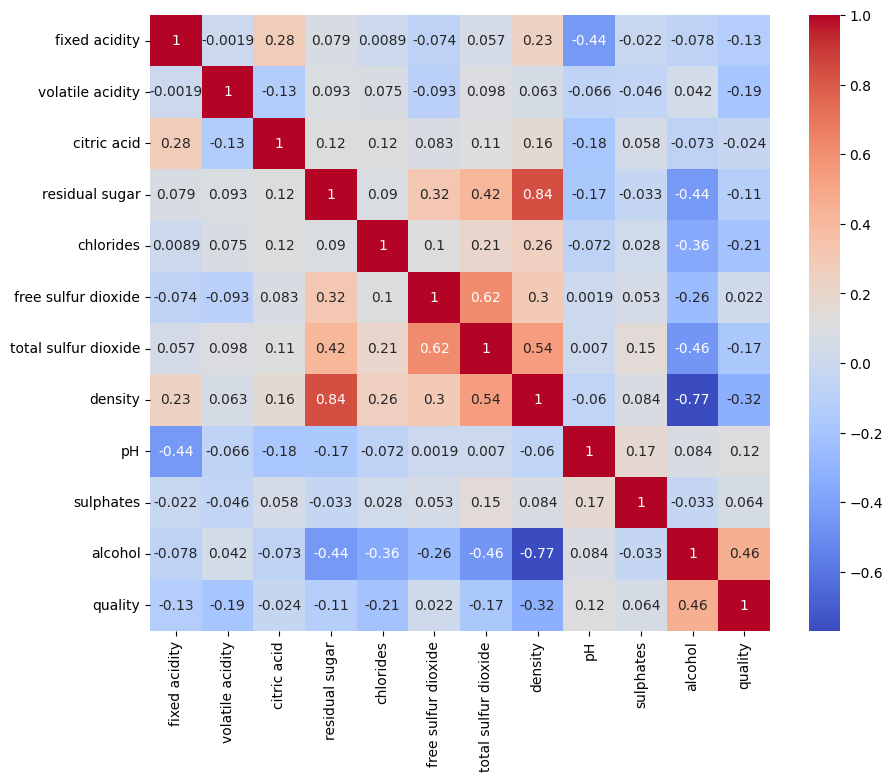

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = wine_data.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')

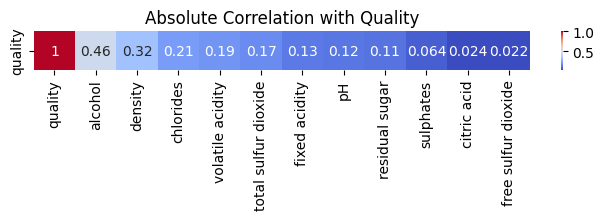

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_q = wine_data.corr(numeric_only=True)["quality"].abs().sort_values(ascending=False)

# 시각화
plt.figure(figsize=(8,0.5))
sns.heatmap(corr_q.to_frame().T, annot=True, cmap='coolwarm', cbar=True)
plt.title("Absolute Correlation with Quality")
plt.show()

In [7]:
# 필드 제거
wine_data = wine_data.drop(columns=['fixed acidity', 'pH', 'free sulfur dioxide'])
wine_data

,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality
0,0.27,0.36,20.7,0.045,170.0,1.00100,0.45,8.8,6
1,0.30,0.34,1.6,0.049,132.0,0.99400,0.49,9.5,6
2,0.28,0.40,6.9,0.050,97.0,0.99510,0.44,10.1,6
3,0.23,0.32,8.5,0.058,186.0,0.99560,0.40,9.9,6
4,0.23,0.32,8.5,0.058,186.0,0.99560,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...
3996,0.28,0.34,8.9,0.048,111.0,0.99455,0.54,11.0,7
3997,0.26,0.29,3.1,0.041,144.0,0.98944,0.39,12.8,7
3998,0.24,0.49,5.8,0.053,120.0,0.99420,0.98,10.5,6
3999,0.24,0.49,5.8,0.053,120.0,0.99420,0.98,10.5,6


## 이상치 탐지

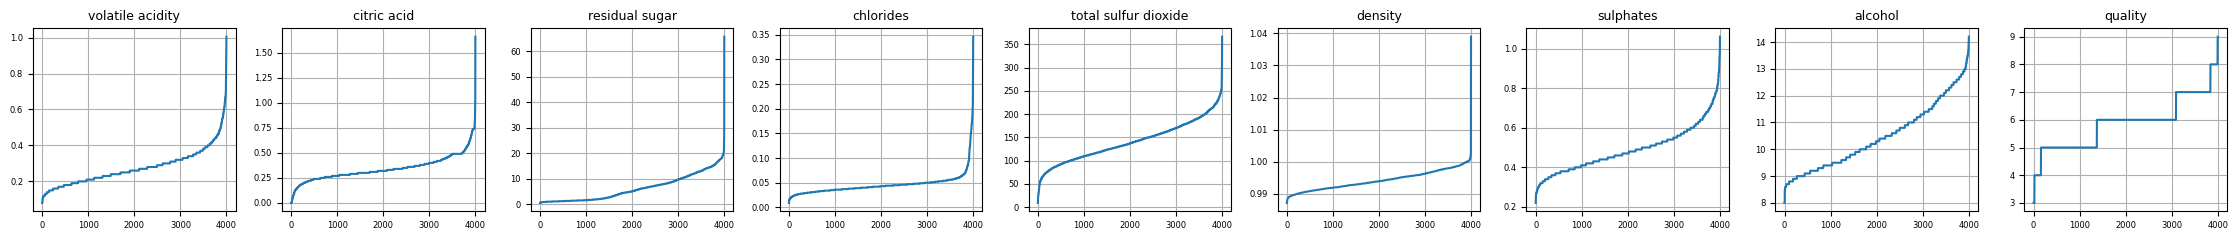

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

n_cols = len(wine_data.columns)
fig, axes = plt.subplots(1, n_cols, figsize=(2.5 * n_cols, 2.5), sharey=False)

for i, col in enumerate(wine_data.columns):
    sorted_values = np.sort(wine_data[col].values)
    sns.lineplot(x=range(len(sorted_values)), y=sorted_values, ax=axes[i])
    axes[i].set_title(col, fontsize=9)
    axes[i].tick_params(axis='x', labelsize=6)
    axes[i].tick_params(axis='y', labelsize=6)
    axes[i].grid(True)

plt.tight_layout()
plt.show()

In [9]:
from scipy.stats import zscore

target_cols = ['citric acid', 'residual sugar', 'chlorides', 'density']
z_scores = np.abs(zscore(wine_data[target_cols]))
outliers = (z_scores > 3).any(axis=1)

filter = outliers & wine_data["quality"].between(5, 7)
filtered_outliers = wine_data[filter]
filtered_outliers

,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality
40,0.23,0.39,2.5,0.172,158.0,0.99370,0.36,9.4,6
41,0.24,0.39,2.9,0.173,157.0,0.99370,0.34,9.4,6
54,0.20,0.59,0.9,0.147,132.0,0.99300,0.38,9.1,6
182,0.28,0.40,22.0,0.048,167.0,1.00100,0.50,8.7,5
191,0.28,0.40,22.0,0.048,167.0,1.00100,0.50,8.7,5
...,...,...,...,...,...,...,...,...,...
3848,0.39,0.79,1.4,0.194,90.0,0.99212,0.46,10.5,6
3902,0.22,0.38,2.8,0.144,65.0,0.99080,0.64,11.4,6
3911,0.23,0.82,1.3,0.149,109.0,0.99304,0.42,9.2,6
3937,0.36,0.36,6.7,0.185,151.0,0.99528,0.42,9.3,5


In [10]:
# 이상치 제거
wine_data = wine_data[~filter]
wine_data

,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality
0,0.27,0.36,20.7,0.045,170.0,1.00100,0.45,8.8,6
1,0.30,0.34,1.6,0.049,132.0,0.99400,0.49,9.5,6
2,0.28,0.40,6.9,0.050,97.0,0.99510,0.44,10.1,6
3,0.23,0.32,8.5,0.058,186.0,0.99560,0.40,9.9,6
4,0.23,0.32,8.5,0.058,186.0,0.99560,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...
3996,0.28,0.34,8.9,0.048,111.0,0.99455,0.54,11.0,7
3997,0.26,0.29,3.1,0.041,144.0,0.98944,0.39,12.8,7
3998,0.24,0.49,5.8,0.053,120.0,0.99420,0.98,10.5,6
3999,0.24,0.49,5.8,0.053,120.0,0.99420,0.98,10.5,6


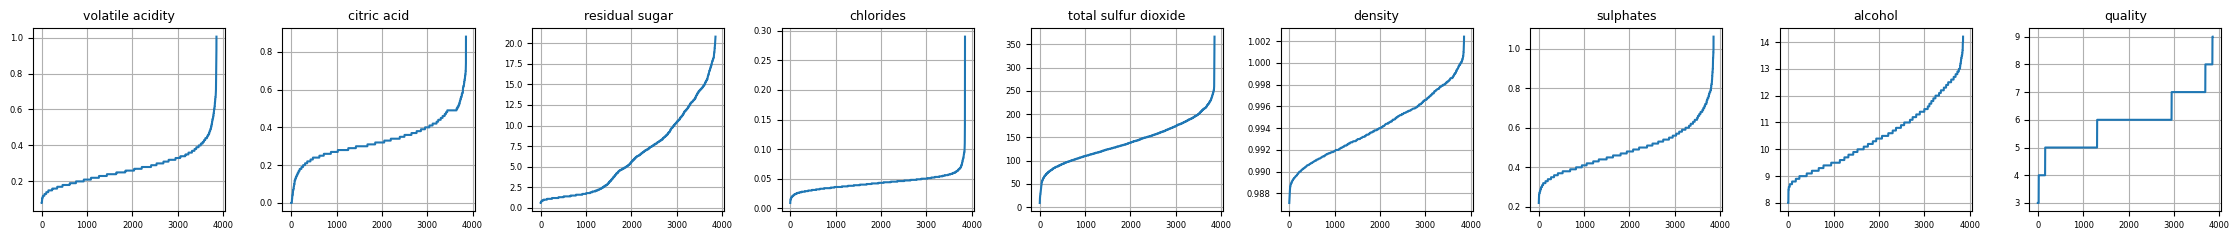

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

n_cols = len(wine_data.columns)
fig, axes = plt.subplots(1, n_cols, figsize=(2.5 * n_cols, 2.5), sharey=False)

for i, col in enumerate(wine_data.columns):
    sorted_values = np.sort(wine_data[col].values)
    sns.lineplot(x=range(len(sorted_values)), y=sorted_values, ax=axes[i])
    axes[i].set_title(col, fontsize=9)
    axes[i].tick_params(axis='x', labelsize=6)
    axes[i].tick_params(axis='y', labelsize=6)
    axes[i].grid(True)

plt.tight_layout()
plt.show()

# 데이터 정리 저장

In [12]:
wine_data.to_csv("wine_data_cleaned.csv", index=False)

# 기타

In [13]:
from scipy.stats import zscore

z_scores = np.abs(zscore(wine_data.select_dtypes(include=[np.number])))
outliers = (z_scores > 3).any(axis=1)
wine_data[outliers]


,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality
17,0.66,0.48,1.2,0.029,75.0,0.98920,0.39,12.8,8
20,0.66,0.48,1.2,0.029,75.0,0.98920,0.39,12.8,8
23,0.67,0.14,1.5,0.074,168.0,0.99370,0.51,9.3,5
60,0.22,0.24,4.9,0.092,123.0,0.99510,0.46,8.6,6
96,0.34,0.66,15.9,0.046,164.0,0.99790,0.50,8.8,6
...,...,...,...,...,...,...,...,...,...
3961,0.39,0.46,11.7,0.084,170.0,0.99773,0.51,9.0,5
3962,0.58,0.27,5.8,0.032,118.0,0.99088,0.53,13.0,7
3998,0.24,0.49,5.8,0.053,120.0,0.99420,0.98,10.5,6
3999,0.24,0.49,5.8,0.053,120.0,0.99420,0.98,10.5,6


In [14]:
z_scores[outliers]

,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality
17,3.870661,1.398697,1.038143,1.095058,1.501033,1.711451,0.864958,1.906814,2.294644
20,3.870661,1.398697,1.038143,1.095058,1.501033,1.711451,0.864958,1.906814,2.294644
23,3.971216,1.816893,0.977106,2.374816,0.646260,0.147605,0.177698,0.978977,0.971115
60,0.553727,0.871131,0.285342,3.762766,0.392752,0.338925,0.256742,1.556135,0.117471
96,0.652925,3.101069,1.952715,0.215783,0.553903,1.311986,0.090810,1.391233,0.117471
...,...,...,...,...,...,...,...,...,...
3961,1.155696,1.209545,1.098184,3.145900,0.692438,1.252907,0.177698,1.226330,0.971115
3962,3.066227,0.587403,0.102229,0.863733,0.508198,1.127615,0.351474,2.071717,1.206058
3998,0.352618,1.493274,0.102229,0.755542,0.462020,0.026156,4.261434,0.010437,0.117471
3999,0.352618,1.493274,0.102229,0.755542,0.462020,0.026156,4.261434,0.010437,0.117471


In [15]:
from scipy.stats import zscore
import numpy as np

# 수치형 컬럼만 추출 (ID 제외)
numeric_cols = wine_data.select_dtypes(include=[np.number])

# Z-score 계산
z_scores = numeric_cols.apply(zscore)

# 각 컬럼별 가장 큰 Z-score를 가진 인덱스 수집
outlier_indices = set()
for col in z_scores.columns:
    max_idx = z_scores[col].abs().idxmax()
    outlier_indices.add(max_idx)

# 해당 인덱스의 원본 row 추출
outlier_df = wine_data.loc[list(outlier_indices)]

# 정렬 (ID 기준)
outlier_df = outlier_df.reset_index(drop=True)

outlier_df

,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality
0,0.270,0.45,10.60,0.035,124.0,0.99700,0.46,10.4,9
1,0.550,0.35,15.55,0.057,366.5,1.00010,0.63,11.0,3
2,0.200,0.28,1.60,0.028,168.0,0.99203,1.06,11.5,6
3,0.350,0.28,1.60,0.037,113.0,0.98779,0.40,14.2,7
4,0.670,0.30,13.00,0.290,193.0,0.99840,0.67,9.0,4
5,0.440,0.88,6.20,0.049,124.0,0.99680,0.51,9.9,4
6,0.240,0.36,20.80,0.031,139.0,0.99750,0.33,11.0,6
7,0.230,0.35,17.80,0.058,212.0,1.00241,0.43,8.9,5
8,1.005,0.46,1.40,0.046,185.0,0.99660,0.49,10.2,4


In [16]:
wine_data.describe().loc[["min", "mean", "max"]]

,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality
min,0.080000,0.000000,0.600000,0.009000,9.000000,0.987130,0.220000,8.000000,3.000000
mean,0.275067,0.332109,6.302451,0.043202,140.010246,0.994125,0.489549,10.487341,5.892088
max,1.005000,0.880000,20.800000,0.290000,366.500000,1.002410,1.060000,14.200000,9.000000


In [17]:
normal = (wine_data - wine_data.min()) / (wine_data.max() - wine_data.min())
normal['quality'] = wine_data['quality']
normal

,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality
0,0.205405,0.409091,0.995050,0.128114,0.450350,0.907723,0.273810,0.129032,6
1,0.237838,0.386364,0.049505,0.142349,0.344056,0.449607,0.321429,0.241935,6
2,0.216216,0.454545,0.311881,0.145907,0.246154,0.521597,0.261905,0.338710,6
3,0.162162,0.363636,0.391089,0.174377,0.495105,0.554319,0.214286,0.306452,6
4,0.162162,0.363636,0.391089,0.174377,0.495105,0.554319,0.214286,0.306452,6
...,...,...,...,...,...,...,...,...,...
3996,0.216216,0.386364,0.410891,0.138790,0.285315,0.485602,0.380952,0.483871,7
3997,0.194595,0.329545,0.123762,0.113879,0.377622,0.151178,0.202381,0.774194,7
3998,0.172973,0.556818,0.257426,0.156584,0.310490,0.462696,0.904762,0.403226,6
3999,0.172973,0.556818,0.257426,0.156584,0.310490,0.462696,0.904762,0.403226,6


In [18]:
wine_data = pd.read_csv('./wine_data_homework.csv')
wine_data = wine_data.drop(columns=[wine_data.columns[0]])
normal = (wine_data - wine_data.min()) / (wine_data.max() - wine_data.min())

# 모델 검증

In [22]:
wine_origin = pd.read_csv('./wine_data_homework.csv')
wine_origin = wine_origin.drop(columns=[wine_origin.columns[0], 'fixed acidity', 'pH', 'free sulfur dioxide'])

wine_cleaned = pd.read_csv('./wine_data_cleaned.csv')

In [23]:
def split_data(original: pd.DataFrame):
    original = original.drop(columns=[original.columns[0]])
    data = (original - original.min()) / (original.max() - original.min())
    data['quality'] = original['quality']

    X = data.drop("quality", axis=1)
    y = data["quality"]
    return X, y


origin_x, origin_y = split_data(wine_origin)
cleaned_x, cleaned_y = split_data(wine_cleaned)

### RandomForest Validation

In [24]:
import joblib
import numpy as np
import pandas as pd
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, r2_score,
    confusion_matrix, roc_curve, auc
)
import matplotlib.pyplot as plt
import seaborn as sns

model = joblib.load("model/rf_model.pkl")
y_pred = model.predict(origin_x)

mae = mean_absolute_error(origin_y, y_pred)
mse = mean_squared_error(origin_y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(origin_y, y_pred)
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

MAE: 0.7620
MSE: 0.9113
RMSE: 0.9546
R²: -0.1012


d:\Sagi_JJU D\MlFlow\.venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


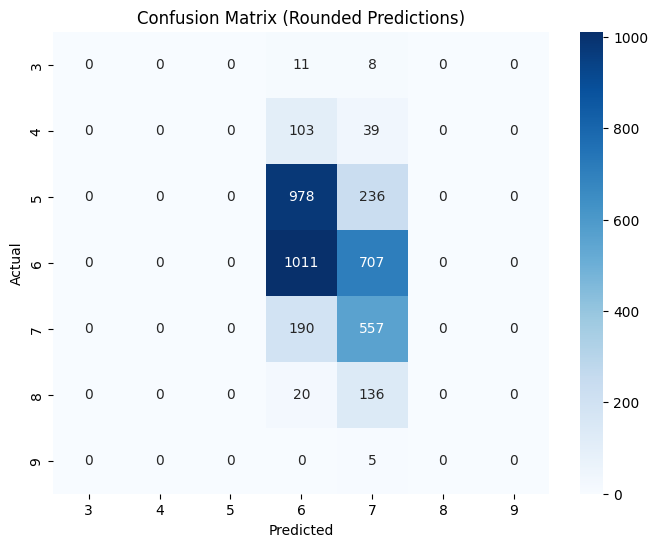

In [34]:
y_pred_int = np.floor(y_pred + 0.5).astype(int)
y_true_int = np.floor(origin_y + 0.5).astype(int)
# y_pred_round = np.round(y_pred).astype(int)
# y_true_int = np.round(origin_y).astype(int)
labels = sorted(np.unique(np.concatenate([y_true_int, y_pred_int])))
cm = confusion_matrix(y_true_int, y_pred_int, labels=labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_true_int),
            yticklabels=np.unique(y_true_int))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Rounded Predictions)")
plt.show()

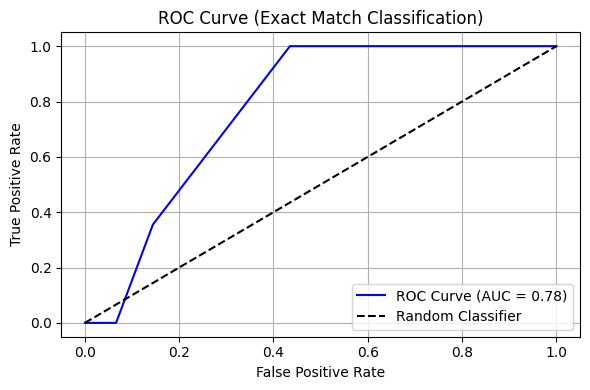

In [37]:
y_true_bin = (y_true_int == y_pred_int).astype(int)
y_score = y_true_int

fpr, tpr, _ = roc_curve(y_true_bin, y_score)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color='blue')
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Exact Match Classification)")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()
# plt.savefig("roc_auc_exact_match.png")
# plt.close()